---
<img src="https://asset.brandfetch.io/idvDrMBg3m/idgDR62lX4.png" alt="Logo Data Rockstars" width="274" height="80">

### 🔒 Le contenu de ce document est confidentiel. 📝
_Le contenu de ce document est confidentiel et la copie ou la distribution est interdite._ 😶‍🌫️

📧 Pour toute question, veuillez nous contacter à [contact@datarockstars.ai](mailto:contact@datarockstars.ai)

---
# Le programme du notebook

**📖 Au programme**
- Rappels de SQL

**🎁 Les takeaways**
- Slides de cours
- Accès à la plateforme
- Notebooks
- Snippets penses bêtes de code que vous pouvez garder à vie

---

# Motivation
Ce notebook est une introduction à l'analyse de données en utilisant le langage SQL, qui est être un outil indispensable pour tout analyste de données - à la fois pour accéder aux données mais aussi pour les traiter.

La logique derrière SQL est très similaire à tout autre outil ou langage utilisé pour l'analyse de données (Excel, Pandas), et pour ceux qui ont l'habitude de travailler avec des données, cela devrait être très intuitif.

**Conseil : N'hésitez pas à explorer au maximum les données et d'aller au-delà des questions formulées. La pratique est essentielle pour renforcer vos compétences en analyse de données. Évitez également de regarder les indices trop facilement.**

# Imports et initialisation

### Question

**Question 0.** Montez votre Drive sur ce notebook pour pouvoir accéder au dataset à partir de Google Colab.

**Indice :**

Pour monter un Drive sur un Notebook, consultez la [documentation](https://colab.research.google.com/notebooks/io.ipynb).

### Réponse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Question

**Question 1.** Commencez par importer les bibliothèques nécessaires pour traiter et analyser les données. Nous aurons besoin des bibliothèques suivantes : pandas, numpy, sqlite3, matplotlib, csv.

**Rappel de cours :**

- **pandas** est une bibliothèque Python permettant la manipulation et l'analyse des données.
- **numpy** est utilisé pour les opérations mathématiques et de matrices
- **sqlite3** est utilisé pour interagir avec une base de données SQLite.
- **matplotlib** est utilisé pour la visualisation des données.
- **csv** est utilisé pour la gestion des fichiers csv

### Réponse

In [ ]:
#Imports

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import csv

### Question

**Question 2.** Il est nécessaire de charger la base de données pour pouvoir l'utiliser. Connectez-vous à la base de données et affichez les tables disponibles.

**Rappel de cours :**
Deux moyens s'offrent à vous pour charger la base de données. Vous pouvez vous connecter à une base de données SQLite en utilisant sqlite3.connect() puis exécuter une requête SQL grâce à pd.read_sql(). Sinon, vous pouvez utilisez pd.read_csv() pour charger une table en CSV puis la transformer en table sql en utilisant to_sql().

### Réponse

In [ ]:
conn = sqlite3.connect("drive/MyDrive/Bootcamp Data Analyst/database.sqlite")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# Exploration initiale des données



### Question

**Question 3.** Affichez les données disponibles dans la table "Country". Explorez les autres tables, prenez connaissance de leurs colonnes et des repérez les clés primaires de chacune d'elles.

**Rappel de cours :**

Une clé primaire est un ensemble d'une ou de plusieurs colonnes d'une table qui est utilisé pour identifier de manière unique chaque ligne de cette table.

### Réponse

In [ ]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### Question

**Question 4.** Joignez les tables "League" et "Country" sur l'ID du pays et affichez les résultats. Donnez alors le nom de la compétition néerlandaise (Country.name = Netherlands)

**Rappel de cours :**
Les jointures SQL sont utilisées pour combiner des lignes de deux ou plusieurs tables en fonction d'une colonne liée entre elles. JOIN est utilisé pour combiner des lignes de deux ou plusieurs tables.

### Réponse

In [ ]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [ ]:
netherlands_league = pd.read_sql("""SELECT League.name
                                  FROM League
                                  JOIN Country ON Country.id = League.country_id
                                  WHERE Country.name = 'Netherlands';""", conn)
netherlands_league

,name
0,Netherlands Eredivisie


### Question

**Question 5.** Affichez les 10 premières équipes de la table "Team".

### Réponse

In [ ]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


### Question

**Question 6.** Pour les matchs joués en Espagne, affichez des détails tels que le nom du pays, le nom de la ligue, la saison, l'équipe à domicile, l'équipe à l'extérieur, les buts de l'équipe à domicile et les buts de l'équipe à l'extérieur. Limitez les résultats aux 10 premières entrées.

**Conseil :**

Déterminez quelles tables peuvent vous être utiles puis utilisez LEFT JOIN pour lier les tables entre elles et récupérer les colonnes qui vous intéressent.

**Rappel de cours :**

L'utilisation de LEFT JOIN garantit que même si une équipe n'est pas trouvée dans la table "Team", le match sera toujours affiché dans les résultats.


### Réponse

In [ ]:
detailed_matches = pd.read_sql("""SELECT Match.id,
                                        Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        stage,
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal,
                                        away_team_goal
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


# Analyse approfondie

### Question

**Question 7.** Pour les pays suivants : Espagne, Allemagne, France, Italie et Angleterre, calculez et affichez le nombre d'étapes, le nombre d'équipes, les buts moyens à domicile, les buts moyens à l'extérieur et la différence moyenne de buts pour chaque saison.

**Indice :**

Utilisez les fonctions SQL suivantes : count(), avg(), sum(). N'oubliez pas que ces fonctions d'aggrégations impliquent l'utilisation de mots-clés comme GROUP BY ou HAVING.

### Réponse

In [ ]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors,
                                        avg(away_team_goal) AS avg_away_team_goals,
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif,
                                        avg(home_team_goal+away_team_goal) AS avg_goals,
                                        sum(home_team_goal+away_team_goal) AS total_goals
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


### Question

**Question 8.** En utilisant la table créée Question 7, tracez le nombre moyen de buts par match au fil du temps pour les pays mentionnés précédemment.

**Indice :**
Pour tracer des données, vous pouvez utiliser la méthode plot() sur un DataFrame. Assurez-vous de bien définir les étiquettes des axes et le titre pour une meilleure lisibilité.

### Réponse

<Axes: title={'center': 'Average Goals per Game Over Time'}>

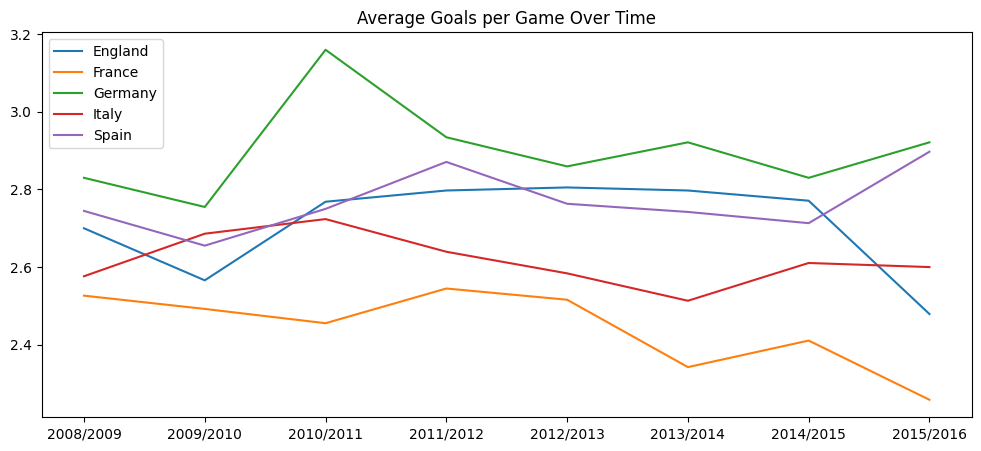

In [ ]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain'] = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

### Question

**Question 9.** En utilisant la table créée Question 7, tracez la différence moyenne de buts par match au fil du temps pour les pays mentionnés.

### Réponse

<Axes: title={'center': 'Average Goals Difference Home vs Out'}>

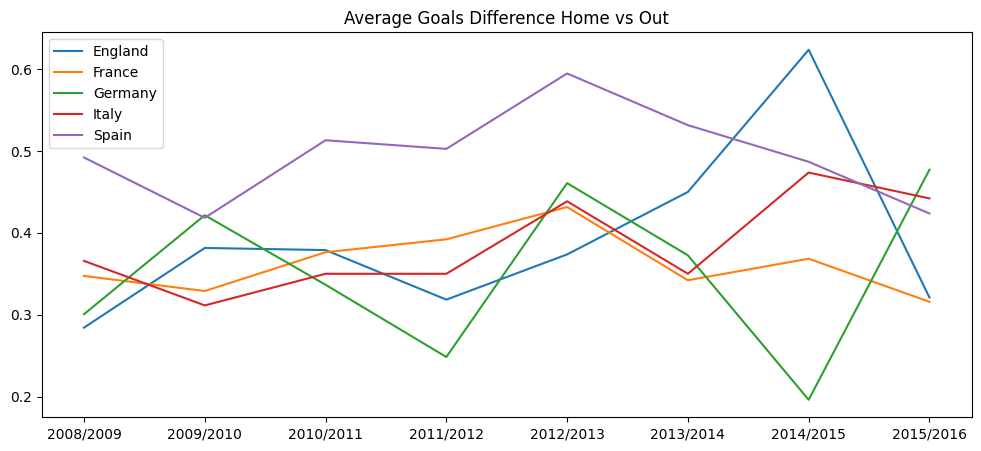

In [ ]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

### Question

**Question 10.** En utilisant les tables Player et Player_Attributes, récupérez la distribution des joueurs en fonction de leur taille arrondie au centimètre, ainsi que leur note moyenne générale, leur potentiel moyen et leur poids moyen.

**Indice :** Utilisez la fonction ROUND() pour récupérer un arrondi de la taille.

### Réponse

In [ ]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height,
                                        COUNT(height) AS distribution,
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id,
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id)
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


## Question

❓ **Question 11.** Examinez l'impact de l'âge des joueurs sur leurs performances.

## Réponse

Ce n'est pas le mieux que l'on puisse faire car la base de données ne comporte pas le nombre de buts par match par joueur (on aurait pu faire des statistiques sur cette donnée), mais on peut quand même utiliser les attributs de joueur et faire des moyennes en regroupant par groupe d'âge.

In [ ]:
# Pour voir quels attributs on souhaite observer (les colonnes de la table player_attributes)

pd.read_sql("""PRAGMA table_info(Player_Attributes);""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,player_fifa_api_id,INTEGER,0,None,0
2,2,player_api_id,INTEGER,0,None,0
3,3,date,TEXT,0,None,0
4,4,overall_rating,INTEGER,0,None,0
5,5,potential,INTEGER,0,None,0
6,6,preferred_foot,TEXT,0,None,0
7,7,attacking_work_rate,TEXT,0,None,0
8,8,defensive_work_rate,TEXT,0,None,0
9,9,crossing,INTEGER,0,None,0


In [ ]:
# On choisit ici les colonnes finishing, sprint_speed, acceleration, agility, strength, vision, marking

players_age_performance = pd.read_sql("""
        SELECT
            birthday,
            CAST(SUBSTR(birthday, 1, 4) AS INTEGER),
            CASE
                WHEN 2025 - CAST(SUBSTR(birthday, 1, 4) AS INTEGER) < 20 THEN '<20'
                WHEN 2025 - CAST(SUBSTR(birthday, 1, 4) AS INTEGER) BETWEEN 20 AND 25 THEN '20-25'
                ELSE '>25'
            END AS Age_Group
        FROM PLAYER
        LEFT JOIN PLAYER_ATTRIBUTES
            ON PLAYER.player_api_id = PLAYER_ATTRIBUTES.player_api_id
        """, conn)

players_age_performance

,birthday,"CAST(SUBSTR(birthday, 1, 4) AS INTEGER)",Age_Group
0,1992-02-29 00:00:00,1992,>25
1,1992-02-29 00:00:00,1992,>25
2,1992-02-29 00:00:00,1992,>25
3,1992-02-29 00:00:00,1992,>25
4,1992-02-29 00:00:00,1992,>25
...,...,...,...
183973,1982-06-05 00:00:00,1982,>25
183974,1982-06-05 00:00:00,1982,>25
183975,1982-06-05 00:00:00,1982,>25
183976,1982-06-05 00:00:00,1982,>25


In [ ]:
# On choisit ici les colonnes finishing, sprint_speed, acceleration, agility, strength, vision, marking

players_age_performance = pd.read_sql("""
        SELECT
            CASE
                WHEN 2017 - CAST(SUBSTR(birthday, 1, 4) AS INTEGER) < 20 THEN '<20'
                WHEN 2017 - CAST(SUBSTR(birthday, 1, 4) AS INTEGER) BETWEEN 20 AND 25 THEN '20-25'
                ELSE '>25'
            END AS Age_Group,
            AVG(finishing) AS Avg_Finishing,
            AVG(sprint_speed) AS Avg_Sprint_Speed,
            AVG(acceleration) AS Avg_Acceleration,
            AVG(agility) AS Avg_Agility,
            AVG(strength) AS Avg_Strength,
            AVG(vision) AS Avg_Vision,
            AVG(marking) AS Avg_Marking
        FROM PLAYER
        LEFT JOIN PLAYER_ATTRIBUTES
            ON PLAYER.player_api_id = PLAYER_ATTRIBUTES.player_api_id
        GROUP BY Age_Group
        ORDER BY Age_Group;
        """, conn)

players_age_performance

,Age_Group,Avg_Finishing,Avg_Sprint_Speed,Avg_Acceleration,Avg_Agility,Avg_Strength,Avg_Vision,Avg_Marking
0,20-25,48.261092,70.240177,70.210213,67.079346,62.270937,53.795903,43.404709
1,<20,41.593103,67.234483,68.462069,62.055172,55.462069,47.751724,38.158621
2,>25,50.290341,67.575699,67.103492,65.730479,68.557541,58.781996,47.513361


On remarque donc que les statistiques sont globalement meilleures pour les jeunes entre 20 et 25 ans : équilibre parfait entre la maturité et la force de la jeunesse.

# Problème complémentaire : Évaluation de l'efficacité offensive des équipes

L'objectif de cette section est d'évaluer quelle équipe, parmi toutes celles des ligues mentionnées, a eu l'efficacité offensive la plus constante tout au long d'une saison donnée. Pour cela, nous allons calculer une "variance des buts marqués" pour chaque équipe.

**Rappel de cours :**

La variance est une mesure statistique de la dispersion d'un ensemble de valeurs. Une variance faible indique que les données ont tendance à être proches de la moyenne (moyenne), tandis qu'une variance élevée indique que les données sont très étalées par rapport à la moyenne.

## Question

❓ **Question 12.** Pour la saison 2014/2015, écrivez un code pour :

a. Calculer le nombre total de buts marqués à domicile par chaque équipe en utilisant une requête SQL.

b. Pour les équipes "Real Madrid CF", "FC Barcelona" et "Paris Saint-Germain", stocker dans des listes, les nombres de buts marqués lors des 19 matchs à domicile de la saison 2014/2015.

c. Utiliser ces trois listes pour calculer la moyenne de buts marqués par match à domicile ainsi que la variance.

d. Sauvegarder le nom des équipes, leur moyenne et leur variance respective dans un fichier nommé "variance_buts_2014_2015.csv".

### Réponse

In [ ]:
goals = pd.read_sql("""SELECT HT.team_long_name,
                              SUM(Match.home_team_goal) AS goals
                        FROM Match
                        LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                        WHERE Match.season = '2014/2015'
                        GROUP BY HT.team_long_name
                        ORDER BY goals DESC
                        ;""", conn)
goals

,team_long_name,goals
0,Real Madrid CF,65
1,FC Barcelona,64
2,Paris Saint-Germain,52
3,PSV,50
4,Celtic,50
...,...,...
183,Granada CF,13
184,Waasland-Beveren,12
185,Córdoba CF,12
186,KSV Cercle Brugge,11


In [ ]:
real_madrid_goals = pd.read_sql("""SELECT Match.home_team_goal
                        FROM Match
                        LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                        WHERE Match.season = '2014/2015'
                        AND HT.team_long_name = 'Real Madrid CF'
                        ;""", conn)
real_madrid_goals = list(real_madrid_goals.iloc[:, 0])

barcelona_goals = pd.read_sql("""SELECT Match.home_team_goal
                        FROM Match
                        LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                        WHERE Match.season = '2014/2015'
                        AND HT.team_long_name = 'FC Barcelona'
                        ;""", conn)
barcelona_goals = list(barcelona_goals.iloc[:, 0])

psg_goals = pd.read_sql("""SELECT Match.home_team_goal
                        FROM Match
                        LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                        WHERE Match.season = '2014/2015'
                        AND HT.team_long_name = 'Paris Saint-Germain'
                        ;""", conn)
psg_goals = list(psg_goals.iloc[:, 0])

In [ ]:
moy_psg = np.mean(psg_goals)
var_psg = np.var(psg_goals)

moy_real = np.mean(real_madrid_goals)
var_real = np.var(real_madrid_goals)

moy_barca = np.mean(barcelona_goals)
var_barca = np.var(barcelona_goals)

print(f"Paris Saint-Germain - Moyenne : {moy_psg}, Écart-Type : {np.sqrt(var_psg)}")
print(f"FC Barcelona - Moyenne : {moy_barca}, Écart-Type : {np.sqrt(var_barca)}")
print(f"Real Madrid CF - Moyenne : {moy_real}, Écart-Type : {np.sqrt(var_real)}")

Paris Saint-Germain - Moyenne : 2.736842105263158, Écart-Type : 1.6493094332623575
FC Barcelona - Moyenne : 3.3684210526315788, Écart-Type : 1.8413532299511475
Real Madrid CF - Moyenne : 3.4210526315789473, Écart-Type : 1.9819126719750244


In [ ]:
to_csv = [["Paris Saint-Germain", moy_psg, var_psg], ["Real Madrid CF", moy_real, var_real], ["FC Barcelona", moy_barca, var_barca]]

with open("variance_buts_2014_2015.csv", 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(to_csv)

### Question

❓ **Question 13.** À partir du fichier généré, déterminez quelle équipe a eu l'efficacité offensive la plus constante (c'est-à-dire la variance la plus basse).

**Rappel de cours :**

Pour lire un fichier, vous pouvez utiliser la fonction open(). Vous pouvez ensuite utiliser une boucle pour parcourir chaque ligne du fichier.

### Réponse

In [ ]:
from_csv = []

with open("variance_buts_2014_2015.csv", 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        from_csv.append(row)

most_regular_team = None
min_var = np.inf
for team in from_csv:
  if min_var > float(team[2]):
    most_regular_team = team[0]
    min_var = float(team[2])

print(f"L'équipe la plus régulière (donc ayant la variance la plus faible) est {most_regular_team} avec une différence moyenne de {np.sqrt(min_var)} buts entre chaque match.")

L'équipe la plus régulière (donc ayant la variance la plus faible) est Paris Saint-Germain avec une différence moyenne de 1.6493094332623575 buts entre chaque match.


### Question

❓ **Question 14.** Pourquoi est-il important d'évaluer la constance d'une équipe plutôt que son nombre total de buts marqués? Comment cela peut-il influencer la stratégie d'une équipe adverse?

### Réponse

**Constance :**
La constance d'une équipe en attaque est plus importante que le nombre total de buts car elle reflète la prévisibilité et la fiabilité. Une équipe constante est plus facile à analyser et à contrer, même si elle marque moins de buts au total. Elle est également plus susceptible de gagner des matchs grâce à sa régularité.

**Stratégie adverse :**
La constance adverse influence la stratégie adoptée. Face à une équipe constante, une défense solide et disciplinée est nécessaire. Si l'attaque adverse est irrégulière, un pressing agressif peut la déstabiliser. L'analyse de la constance permet d'identifier les faiblesses et d'adapter la stratégie en conséquence.

### Question

❓ **Question 15.** Analyser l'effet des conditions météorologiques sur les résultats des matchs. Y a-t-il des équipes qui gagnent davantage par temps pluvieux plutôt que par beau temps ?

🔑 Il vous est possible de trouver les données météorologiques antérieures et pour toutes les positions géographiques que vous voulez grâce aux API WeatherAPI ou OpenWeatherMap par exemple.

### Réponse

In [ ]:
# On commence par importer les librairies nécessaires

import requests
import json

In [ ]:
# On crée cette fonction pour requêter l'API WeatherAPI et récupérer les données météo
# Pour l'utiliser, inscrivez-vous sur ce site "https://www.weatherapi.com/my/" et récupérez votre clé API une fois connecté
# Collez cette clé API dans la variable api_key ci-dessous.

def get_weather_data(latitude, longitude, date):
    """Prend en argument la latitude, la longitude et la date au format YYYY-MM-DD.
    Renvoie un document contenant des données météorologiques pour ce lieu à cette date."""

    api_key = "66357f4cffca48d4b6a140744251802"  # Remplacer l'API Key ici
    url = f"http://api.weatherapi.com/v1/history.json?key={api_key}&q={latitude},{longitude}&dt={date}"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON response: {e}")
        return None

In [ ]:
get_weather_data(48.86720, 2.336570, "2024-10-12")

{'location': {'name': 'Paris',
  'region': 'Ile-de-France',
  'country': 'France',
  'lat': 48.867,
  'lon': 2.333,
  'tz_id': 'Europe/Paris',
  'localtime_epoch': 1739888129,
  'localtime': '2025-02-18 15:15'},
 'forecast': {'forecastday': [{'date': '2024-10-12',
    'date_epoch': 1728691200,
    'day': {'maxtemp_c': 12.2,
     'maxtemp_f': 53.9,
     'mintemp_c': 10.3,
     'mintemp_f': 50.5,
     'avgtemp_c': 11.1,
     'avgtemp_f': 52.1,
     'maxwind_mph': 7.6,
     'maxwind_kph': 12.2,
     'totalprecip_mm': 1.5,
     'totalprecip_in': 0.06,
     'totalsnow_cm': 0.0,
     'avgvis_km': 9.0,
     'avgvis_miles': 5.0,
     'avghumidity': 83,
     'daily_will_it_rain': 1,
     'daily_chance_of_rain': 100,
     'daily_will_it_snow': 0,
     'daily_chance_of_snow': 0,
     'condition': {'text': 'Light drizzle',
      'icon': '//cdn.weatherapi.com/weather/64x64/day/266.png',
      'code': 1153},
     'uv': 3.0},
    'astro': {'sunrise': '08:07 AM',
     'sunset': '07:06 PM',
     'moonr

Comme on le voit dans la cellule suivante, on a la date de chacun des matchs et dans quel stade il se trouve (ou plutôt laquelle des deux équipes joue à domicile). En identifiant la longitude et la latitude de chacune des équipes, on pourrait obtenir la météo à la date du match et déterminer les probabilités de victoire d'une équipe en fonction de la météo.

In [ ]:
match_data = pd.read_sql("""SELECT *
                        FROM Match
                        ;""", conn)
match_data

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
